# Figure 4 Notebook


### Figures 4B-C - Isolated cell firing and during swimming

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


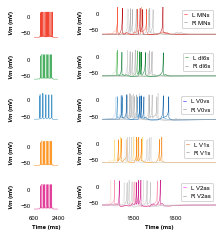

In [7]:

from Izhikevich_class import*
from Analysis_tools import *
import pandas as pd
import numpy as np

### FIGURE SETUP ###

# Declare figure and subplots
fig = plt.figure(constrained_layout=False, figsize=(3.2, 3.4))

widths = [0.75, 3.5]
heights = [1,1,1, 1, 1]
gs = fig.add_gridspec(nrows=5, ncols=2, width_ratios=widths, height_ratios=heights)

#Declare color maps
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')
cmapYellow = matplotlib.cm.get_cmap('YlOrBr')

#Declare line length and width
LINELENGTH = 0.5
LINEWIDTH = 0.5

plt.rc('lines', linewidth=LINEWIDTH) 

#Declare font sizes
SMALL_SIZE = 6

# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

FONT_STYLE = 'bold'

# x range for step current response
x_start = 600
x_end = 2400

# x range for beat and glide simulation results
xstart = 1425
xend = 1700

### END OF FIGURE SETUP ###

#FIRST, GRAPH VOLTAGE TRACES IN RESPONSE TO CURRENT STEP- Figure 4B#

from Izhikevich_class import*
from random import *
from Analysis_tools import *

tmax = 51000
dt = .1
nmax = int(tmax/dt)

 ## This model is based on Izhikevich neuron type:

#Increasing a makes the after current-step repolarization faster
#Increasing b depolarizes the resting membrane potential
#Decreasing d slows the return to rest (or complete inactivation of spking) during a step current.
#    Increasing d decreases the f-i slope
# b is inversely related to the input resistance
# a*b is related to the rate of the after current-step repolarization
# 

nrn = Izhikevich_9P(a=0.5,b=0.01,c=-55, d=100, vmax=10, vr=-65, vt=-58, k=0.5, Cm = 20, dt=dt, x=5.1+1.6,y=-1)

Time = [dt*t for t in range(nmax)]

# Declare MN subplot
fig_MN_firing = fig.add_subplot(gs[0, 0])

All_V_nrn = []
All_spike_times = []
All_inst_freq = []

#Current step parameters
Min_current = 7
Max_current = 9
Current_step = 2
num_steps = Max_current/Current_step
# Determine the size of the current steps
for stim_ in np.arange(Min_current, Max_current, Current_step):

    ## ODE Solving (Time loop)

    res_nrn = nrn.getNextVal(-70., -14, -70.)

    V_nrn = []
    All_V_nrn.append([])
    All_spike_times.append([])
    All_inst_freq.append([])
        
    for t in Time:

        if (t>1000)&(t<2000):
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
        else:
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

        V_nrn.append(res_nrn[0])
        All_V_nrn[-1].append(res_nrn[0])
    #Plot the MN membrane potential
    fig_MN_firing.plot(Time, V_nrn,   c=cmapRed(0.6))
            
fig_MN_firing.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis title
fig_MN_firing.set_ylim([-70,30]) #y-axis limit
#Remove borders
fig_MN_firing.spines['top'].set_visible(False)
fig_MN_firing.spines['right'].set_visible(False)
fig_MN_firing.spines['bottom'].set_visible(False)
fig_MN_firing.spines['left'].set_visible(False)

#Tick parameters
fig_MN_firing.tick_params(axis='both', which='both', length=0)
fig_MN_firing.set_xticks([])
fig_MN_firing.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_MN_firing.title, fig_MN_firing.yaxis.label] +
         fig_MN_firing.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_MN_firing.set_xlim([x_start,x_end]) #x-axis limit

#Simulate and plot dI6 response to current step. Set-up similar to MN
nrn = Izhikevich_9P(a=0.1,b=0.002,c=-55, d=4, vmax=10, vr=-60, vt=-54, k=0.3, Cm = 10, dt=dt, x=5.1+1.6,y=-1)
fig_dI6_firing = fig.add_subplot(gs[1, 0]) 

Min_current = 3
Max_current = 5
Current_step = 2
num_steps = Max_current/Current_step
# Determine the size of the current steps
for stim_ in np.arange(Min_current, Max_current, Current_step):

    ## ODE Solving (Time loop)

    #res_nrn = nrn.getNextVal(-70., -14., -70.)
    res_nrn = nrn.getNextVal(-70., -14, -70.)

    V_nrn = []
    All_V_nrn.append([])
    All_spike_times.append([])
    All_inst_freq.append([])
        
    for t in Time:

        if (t>1000)&(t<2000):
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
        else:
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

        V_nrn.append(res_nrn[0])
        All_V_nrn[-1].append(res_nrn[0])
    
    fig_dI6_firing.plot(Time, V_nrn,   c=cmapGreen(0.6))
            
fig_dI6_firing.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_dI6_firing.set_ylim([-70,30])
fig_dI6_firing.spines['top'].set_visible(False)
fig_dI6_firing.spines['right'].set_visible(False)
fig_dI6_firing.spines['bottom'].set_visible(False)
fig_dI6_firing.spines['left'].set_visible(False)
fig_dI6_firing.tick_params(axis='both', which='both', length=0)
fig_dI6_firing.set_xticks([])
fig_dI6_firing.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_dI6_firing.title, fig_dI6_firing.yaxis.label] +
         fig_dI6_firing.get_xticklabels() + fig_dI6_firing.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_dI6_firing.set_xlim([x_start,x_end])

#Simulate and plot dI6 response to current step. Set-up similar to V0v
nrn = Izhikevich_9P(a=0.01,b=0.002,c=-55, d=2, vmax=8, vr=-60, vt=-54, k=0.3, Cm = 10, dt=dt, x=5.1+1.6,y=-1)
fig_V0v_firing = fig.add_subplot(gs[2, 0]) 

Min_current = 4
Max_current = 6
Current_step = 2
num_steps = Max_current/Current_step
# Determine the size of the current steps
for stim_ in np.arange(Min_current, Max_current, Current_step):

    ## ODE Solving (Time loop)

    res_nrn = nrn.getNextVal(-70., -14, -70.)

    V_nrn = []
    All_V_nrn.append([])
    All_spike_times.append([])
    All_inst_freq.append([])
        
    for t in Time:

        if (t>1000)&(t<2000):
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
        else:
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

        V_nrn.append(res_nrn[0])
        All_V_nrn[-1].append(res_nrn[0])
    
    fig_V0v_firing.plot(Time, V_nrn,   c=cmapBlue(0.6))
            
fig_V0v_firing.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V0v_firing.set_ylim([-80,20])
fig_V0v_firing.spines['top'].set_visible(False)
fig_V0v_firing.spines['right'].set_visible(False)
fig_V0v_firing.spines['bottom'].set_visible(False)
fig_V0v_firing.spines['left'].set_visible(False)
fig_V0v_firing.tick_params(axis='both', which='both', length=0)
fig_V0v_firing.set_xticks([])
fig_V0v_firing.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_V0v_firing.title, fig_V0v_firing.yaxis.label] +
         fig_V0v_firing.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V0v_firing.set_xlim([x_start,x_end])

#Simulate and plot V1 response to current step. Set-up similar to MN
nrn = Izhikevich_9P(a=0.1,b=0.002,c=-55, d=4, vmax=10, vr=-60, vt=-54, k=0.3, Cm = 10, dt=dt, x=5.1+1.6,y=-1)
fig_V1_firing = fig.add_subplot(gs[3, 0]) 

Min_current = 3
Max_current = 5
Current_step = 2
num_steps = Max_current/Current_step
# Determine the size of the current steps
for stim_ in np.arange(Min_current, Max_current, Current_step):

    ## ODE Solving (Time loop)

    #res_nrn = nrn.getNextVal(-70., -14., -70.)
    res_nrn = nrn.getNextVal(-70., -14, -70.)

    V_nrn = []
    All_V_nrn.append([])
    All_spike_times.append([])
    All_inst_freq.append([])
        
    for t in Time:

        if (t>1000)&(t<2000):
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
        else:
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

        V_nrn.append(res_nrn[0])
        All_V_nrn[-1].append(res_nrn[0])
    
    fig_V1_firing.plot(Time, V_nrn,   c=cmapYellow(0.5))
            
fig_V1_firing.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V1_firing.set_ylim([-70,30])
fig_V1_firing.spines['top'].set_visible(False)
fig_V1_firing.spines['right'].set_visible(False)
fig_V1_firing.spines['bottom'].set_visible(False)
fig_V1_firing.spines['left'].set_visible(False)
fig_V1_firing.tick_params(axis='both', which='both', length=0)
fig_V1_firing.set_xticks([])
fig_V1_firing.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_V1_firing.title, fig_V1_firing.yaxis.label] +
         fig_V1_firing.get_xticklabels() + fig_V1_firing.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V1_firing.set_xlim([x_start,x_end])

#Simulate and plot V2a response to current step. Set-up similar to MN
nrn = Izhikevich_9P(a=0.1,b=0.002,c=-55, d=4, vmax=10, vr=-60, vt=-54, k=0.3, Cm = 10, dt=dt, x=5.1+1.6,y=-1)
fig_V2a_firing = fig.add_subplot(gs[4, 0]) 

Min_current = 3
Max_current = 5
Current_step = 2
num_steps = Max_current/Current_step
# Determine the size of the current steps
for stim_ in np.arange(Min_current, Max_current, Current_step):

    ## ODE Solving (Time loop)

    res_nrn = nrn.getNextVal(-70., -14, -70.)

    V_nrn = []
    All_V_nrn.append([])
    All_spike_times.append([])
    All_inst_freq.append([])
        
    for t in Time:

        if (t>1000)&(t<2000):
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
        else:
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

        V_nrn.append(res_nrn[0])
        All_V_nrn[-1].append(res_nrn[0])
    
    fig_V2a_firing.plot(Time, V_nrn,   c=cmapRedPurple(0.6))
            
fig_V2a_firing.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V2a_firing.set_ylim([-70,30])
fig_V2a_firing.spines['top'].set_visible(False)
fig_V2a_firing.spines['right'].set_visible(False)
fig_V2a_firing.spines['bottom'].set_visible(False)
fig_V2a_firing.spines['left'].set_visible(False)
fig_V2a_firing.tick_params(axis='both', which='both', length=0)
fig_V2a_firing.set_xticks([i*1800 + 600 for i in range(0,2)])
fig_V2a_firing.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_V2a_firing.title, fig_V2a_firing.yaxis.label] +
         fig_V2a_firing.get_xticklabels() + fig_V2a_firing.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V2a_firing.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight = FONT_STYLE)
fig_V2a_firing.set_xlim([x_start,x_end])


### NOW PLOTTING NEURON ACTIVITY DURING SWIMMING SIMULATION - FIGURE 4C ###
# Import pandas for data saving
import pandas as pd
import numpy as np
from pylab import *
from Analysis_tools import *

# Read the data file with the simulation results
read_data = pd.read_csv("Beat_and_Glide_10000ms.csv")
read_data

data_top = list(read_data.columns.values.tolist())
data_top

MN_index = []
dI6_index = [] 
V0v_index = []  
V2a_index = [] 
V1_index = []
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('dI6') != -1):
        dI6_index.append(int(data_top[i][data_top[i].find('dI6')+3:data_top[i].find('dI6')+5]))
        ndI6 = max(dI6_index) + 1
    if (data_top[i].find('V0v') != -1):
        V0v_index.append(int(data_top[i][data_top[i].find('V0v')+3:data_top[i].find('V0v')+5]))
        nV0v = max(V0v_index) + 1
    if (data_top[i].find('V2a') != -1):
        V2a_index.append(int(data_top[i][data_top[i].find('V2a')+3:data_top[i].find('V2a')+5]))
        nV2a = max(V2a_index) + 1
    if (data_top[i].find('V1') != -1):
        V1_index.append(int(data_top[i][data_top[i].find('V1')+2:data_top[i].find('V1')+4]))
        nV1 = max(V1_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nMN
VLMN = read_sim[1:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + ndI6
VLdI6 = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + ndI6
VRdI6 = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VLV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VRV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VLV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VRV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV1
VLV1 = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV1
VRV1 = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END

#y-axis limits
lower_y = -80
upper_y = 20

#Declare the subplots for each cell type
fig_MN_activity = fig.add_subplot(gs[0, 1])
fig_dI6_activity = fig.add_subplot(gs[1, 1])
fig_V0v_activity = fig.add_subplot(gs[2, 1])
fig_V1_activity = fig.add_subplot(gs[3, 1])
fig_V2a_activity = fig.add_subplot(gs[4, 1])


# list traces from each cell to plot
list_MNs = [int(nMN*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_dI6s = [int(nMN*i/4) for i in range(1,4) if int(nMN*i/4) < ndI6]
list_V0vs = [int(nMN*i/4) for i in range(1,4) if int(nMN*i/4) < nV0v] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V2as = [int(nMN*i/4) - 2 for i in range(1,4) if 0 < int(nMN*i/4) - 2 < nV2a] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V1s = [int(nMN*i/4) - 4 for i in range(1,4) if 0 < int(nMN*i/4) - 4 < nV1] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis


# plotting MN traces
for k in list_MNs:
    lines_left, = fig_MN_activity.plot(Time, VLMN[k,:], c=cmapRed((k+1)/nMN),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_MN_activity.plot(Time, VRMN[k,:], c=cmapGrey((k+1)/nMN/2), linestyle='-')
#Set up legend
leg=fig_MN_activity.legend(handles=[lines_left, lines_right], labels=['L MNs','R MNs'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_MN_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis title
fig_MN_activity.set_ylim([lower_y, upper_y]) #y-axis limit
#Remove borders
fig_MN_activity.spines['top'].set_visible(False)
fig_MN_activity.spines['right'].set_visible(False)
fig_MN_activity.spines['bottom'].set_visible(False)
fig_MN_activity.spines['left'].set_visible(False)
#Tick parameters
fig_MN_activity.tick_params(axis='both', which='both', length=0)
fig_MN_activity.set_xticks([])
fig_MN_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_MN_activity.title, fig_MN_activity.xaxis.label, fig_MN_activity.yaxis.label] +
         fig_MN_activity.get_xticklabels() + fig_MN_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_MN_activity.set_xlim([xstart, xend]) #x-axis limits
fig_MN_activity.set_yticks([i*50 + -50 for i in range(0,2)])

# plotting dI6 traces. Same set-up as MNs
for k in list_dI6s:
    lines_left, = fig_dI6_activity.plot(Time, VLdI6[k,:], c=cmapGreen((k+1)/ndI6),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_dI6_activity.plot(Time, VRdI6[k,:], c=cmapGrey((k+1)/ndI6/2), linestyle='-')
leg=fig_dI6_activity.legend(handles=[lines_left, lines_right], labels=['L dI6s','R dI6s'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_dI6_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_dI6_activity.set_ylim([lower_y, upper_y])
fig_dI6_activity.spines['top'].set_visible(False)
fig_dI6_activity.spines['right'].set_visible(False)
fig_dI6_activity.spines['bottom'].set_visible(False)
fig_dI6_activity.spines['left'].set_visible(False)
fig_dI6_activity.tick_params(axis='both', which='both', length=0)
fig_dI6_activity.set_xticks([])
fig_dI6_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_dI6_activity.title, fig_dI6_activity.xaxis.label, fig_dI6_activity.yaxis.label] +
         fig_dI6_activity.get_xticklabels() + fig_dI6_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_dI6_activity.set_xlim([xstart, xend])

# plotting V0v traces. Same set-up as MNs
for k in list_V0vs:
    lines_left, = fig_V0v_activity.plot(Time, VLV0v[k,:], c=cmapBlue((k+1)/nV0v),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_V0v_activity.plot(Time, VRV0v[k,:], c=cmapGrey((k+1)/nV0v/2), linestyle='-')
leg=fig_V0v_activity.legend(handles=[lines_left, lines_right], labels=['L V0vs','R V0vs'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_V0v_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V0v_activity.set_ylim([lower_y, upper_y])
fig_V0v_activity.spines['top'].set_visible(False)
fig_V0v_activity.spines['right'].set_visible(False)
fig_V0v_activity.spines['bottom'].set_visible(False)
fig_V0v_activity.spines['left'].set_visible(False)
fig_V0v_activity.tick_params(axis='both', which='both', length=0)
fig_V0v_activity.set_xticks([])
fig_V0v_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_V0v_activity.title, fig_V0v_activity.xaxis.label, fig_V0v_activity.yaxis.label] +
         fig_V0v_activity.get_xticklabels() + fig_V0v_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V0v_activity.set_xlim([xstart, xend])
fig_V0v_activity.set_yticks([i*50 + -50 for i in range(0,2)])

# plotting V1 traces. Same set-up as MNs
for k in list_V1s:
    lines_left, = fig_V1_activity.plot(Time, VLV1[k,:],  c=cmapYellow((k+1)/nV1),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_V1_activity.plot(Time, VRV1[k,:], c=cmapGrey((k+1)/nV1/2), linestyle='-')
leg=fig_V1_activity.legend(handles=[lines_left, lines_right], labels=['L V1s','R V1s'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color(cmapYellow(0.7))
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_V1_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V1_activity.set_ylim([lower_y, upper_y])
fig_V1_activity.spines['top'].set_visible(False)
fig_V1_activity.spines['right'].set_visible(False)
fig_V1_activity.spines['bottom'].set_visible(False)
fig_V1_activity.spines['left'].set_visible(False)
fig_V1_activity.tick_params(axis='both', which='both', length=0)
fig_V1_activity.set_xticks([])
fig_V1_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_V1_activity.title, fig_V1_activity.xaxis.label, fig_V1_activity.yaxis.label] +
         fig_V1_activity.get_xticklabels() + fig_V1_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V1_activity.set_xlim([xstart, xend])

# plotting V2a traces. Same set-up as MNs
for k in list_V2as:
    lines_left, = fig_V2a_activity.plot(Time, VLV2a[k,:], c=cmapRedPurple((k+1)/nV2a),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_V2a_activity.plot(Time, VRV2a[k,:], c=cmapGrey((k+1)/nV2a/2), linestyle='-')
leg=fig_V2a_activity.legend(handles=[lines_left, lines_right], labels=['L V2as','R V2as'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALL_SIZE)
leg.legendHandles[0].set_color('magenta')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_V2a_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V2a_activity.set_ylim([lower_y, upper_y])
fig_V2a_activity.spines['top'].set_visible(False)
fig_V2a_activity.spines['right'].set_visible(False)
fig_V2a_activity.spines['bottom'].set_visible(False)
fig_V2a_activity.spines['left'].set_visible(False)
fig_V2a_activity.tick_params(axis='both', which='both', length=0)
fig_V2a_activity.set_xticks([1500, 1600])
fig_V2a_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_V2a_activity.title, fig_V2a_activity.xaxis.label, fig_V2a_activity.yaxis.label] +
         fig_V2a_activity.get_xticklabels() + fig_V2a_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V2a_activity.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight = FONT_STYLE)
fig_V2a_activity.set_xlim([xstart, xend])

plt.tight_layout()
plt.savefig("Beat_and_glide_steps_and_activity.png", dpi=1000)
plt.show()

### Figure 4D-G - Local body angles, the episode duration, inter-episode intervals and instantaneous frequency

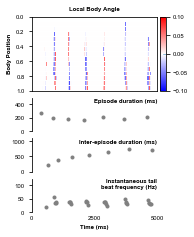

In [8]:

# Import pandas for data saving
import pandas as pd
import numpy as np
from pylab import *
from Analysis_tools import *

#Read data from base model simulation
read_data = pd.read_csv("Beat_and_Glide_10000ms.csv")
read_data

data_top = list(read_data.columns.values.tolist())
data_top

MN_index = []
dI6_index = [] 
V0v_index = []  
V2a_index = [] 
V1_index = []
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('dI6') != -1):
        dI6_index.append(int(data_top[i][data_top[i].find('dI6')+3:data_top[i].find('dI6')+5]))
        ndI6 = max(dI6_index) + 1
    if (data_top[i].find('V0v') != -1):
        V0v_index.append(int(data_top[i][data_top[i].find('V0v')+3:data_top[i].find('V0v')+5]))
        nV0v = max(V0v_index) + 1
    if (data_top[i].find('V2a') != -1):
        V2a_index.append(int(data_top[i][data_top[i].find('V2a')+3:data_top[i].find('V2a')+5]))
        nV2a = max(V2a_index) + 1
    if (data_top[i].find('V1') != -1):
        V1_index.append(int(data_top[i][data_top[i].find('V1')+2:data_top[i].find('V1')+4]))
        nV1 = max(V1_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nMN
VLMN = read_sim[1:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + ndI6
VLdI6 = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + ndI6
VRdI6 = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VLV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VRV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VLV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VRV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV1
VLV1 = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV1
VRV1 = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END

TIME_END = 5000

#discretization time used in the simulation
dt = 0.1

#Declare figure and subplots
fig = plt.figure(constrained_layout=False, figsize=(2.4, 3.6))

widths = [2.4, 0.1]
heights = [1.5, 1.5, 1.5, 1.5, 1.5]

gs = fig.add_gridspec(nrows=5, ncols=2, width_ratios=widths, height_ratios=heights)
gs.update(wspace=0.05, hspace=0.2)

#font size
SMALL_SIZE = 6

# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

FONT_STYLE = 'bold'

MARKER_SIZE = 4 #marker size for plots

nmax = 50000 #using 5000ms, or 50000 time points, to be consistent with knockout sims where first epoch is 5000
nMuscle = len(VLMuscle[:,0])

### Calculate angles

vmin_=-0.1 
vmax_=0.1

ymin = 0
ymax = 5000

# Allocating arrays for velocity and position
vel = np.zeros((nMuscle, nmax))
pos = np.zeros((nMuscle, nmax))

# Setting constants and initial values for vel. and pos.
khi = 3.0  #damping cste , high khi =0.5/ low = 0.1
w0 = 2.5 #2.5  #20Hz = 125.6
vel0 = 0.0
pos0 = 0.0
Wd = w0

for k in range (0,nMuscle):
    vel[k,0] = vel0    #Sets the initial velocity
    pos[k,0] = pos0    #Sets the initial position
    pos[nMuscle-1,0] = 0.0
    for i in range(1,nmax):

        vel[k,i] = -(w0**2)*pos[k,i-1]*dt + vel[k,i-1]*(1-(2*dt*khi*w0)) + 0.1*VRMuscle[k,i-1]*dt - 0.1*VLMuscle[k,i-1]*dt
        pos[k,i] = dt*vel[k,i-1] + pos[k,i-1]

pos2 = pos.transpose()
angle = pos2
FFT = zeros((nmax,nMuscle-1))
FFT2 = zeros((int(nmax/2),nMuscle-1))

# Plot body angles
fig_angle = fig.add_subplot(gs[0:2, 0])

im=fig_angle.pcolormesh(np.arange(nmax)*dt, np.arange(1, nMuscle+1)/nMuscle, pos, cmap=plt.cm.bwr, vmin=-0.1, vmax=0.1)

fig_angle.set_title('Local Body Angle', fontsize = SMALL_SIZE, fontweight = FONT_STYLE) # plot title
fig_angle.set_ylabel('Body Position', fontsize = SMALL_SIZE, fontweight = FONT_STYLE) # y-axis title
fig_angle.set_xticks([]) #x-axis ticks
fig_angle.set_yticks([i*0.2 for i in range(0,6)]) #y-axis ticks
fig_angle.set_ylim([1.0, 0.0])

for item in (fig_angle.get_xticklabels() + fig_angle.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)

#set up color map for body angle plot
axes = plt.subplot(gs[0:2,1])    
cbar = fig.colorbar(im, cax=axes)
cbar.ax.tick_params(labelsize=SMALL_SIZE)
cbar.ax.ticklabel_format(axis = 'both', style='sci')

### PLOT EPISODE DURATION, INTER-EPISODE INTERVAL, AND TAIL BEAT FREQUENCY

#First calculate start, end and durations of swim episodes using detect_event function
Start, End, Duration = detect_event(VLMuscle, VRMuscle, Time, Threshold=.5)
#Then calculate number of tail beats, interbeat intervals, start times and beat times using calc_tail_beat_freq function
num_tail_beats, interbeat_intervals, start_times, beat_times = calc_tail_beat_freq(VRMuscle, VLMuscle, nmax = len(Time), 
                                                        dt = 0.1, lower_bound = -0.5, upper_bound = 0.5, delay = 1000)

MARKER_SIZE = 3

#Add different subplots
fig_duration = fig.add_subplot(gs[2, 0])
fig_inter_episode = fig.add_subplot(gs[3, 0])
fig_freq = fig.add_subplot(gs[4, 0])
fig_freq.set_xlabel('Time (ms)', fontsize=SMALL_SIZE, fontweight = FONT_STYLE)

# Remove borders
fig_duration.spines['top'].set_visible(False)
fig_duration.spines['right'].set_visible(False)
fig_duration.spines['bottom'].set_visible(False)

fig_inter_episode.spines['top'].set_visible(False)
fig_inter_episode.spines['right'].set_visible(False)
fig_inter_episode.spines['bottom'].set_visible(False)

fig_freq.spines['top'].set_visible(False)
fig_freq.spines['right'].set_visible(False)
fig_freq.spines['bottom'].set_visible(False)

# plot swim episode durations
fig_duration.plot(Start, Duration, 'o', color = 'gray', markersize=MARKER_SIZE, zorder=1)
fig_duration.text(1,0.9,'Episode duration (ms)',  horizontalalignment='right', verticalalignment='center', 
                  transform=fig_duration.transAxes, fontsize=SMALL_SIZE, fontweight = FONT_STYLE)
for item in ([fig_duration.title, fig_duration.xaxis.label, fig_duration.yaxis.label] +
         fig_duration.get_xticklabels() + fig_duration.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
            
fig_duration.set_xticks([])
fig_duration.set_yticks([i*200 for i in range(0,6)])

fig_duration.set_xlim([0, TIME_END])
fig_duration.set_ylim([0, 500])

# plot inter-episode intervals
iei = [Start[i+1] - End[i] for i in range(len(End)-1)]
fig_inter_episode.plot(End[:-1], iei, 'o', color = 'gray', markersize=MARKER_SIZE, zorder=1)
fig_inter_episode.text(1,0.9, 'Inter-episode duration (ms)', horizontalalignment='right', verticalalignment='center', 
                       transform=fig_inter_episode.transAxes, fontsize=SMALL_SIZE, fontweight = FONT_STYLE)
for item in ([fig_inter_episode.title, fig_inter_episode.xaxis.label, fig_inter_episode.yaxis.label] +
         fig_inter_episode.get_xticklabels() + fig_inter_episode.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
            
fig_inter_episode.set_xticks([])
fig_inter_episode.set_yticks([i*500 for i in range(0,3)])

fig_inter_episode.set_xlim([0, TIME_END])
fig_inter_episode.set_ylim([0, 1100])

# plot swim instantaneous frequency
inst_freq = [1000/interbeat_intervals[i] if not np.isnan(interbeat_intervals[i]) else math.nan for i in range(0, len(interbeat_intervals))]
fig_freq.plot(beat_times, inst_freq, 'o', color = 'gray', markersize=MARKER_SIZE, zorder=1)
fig_freq.text(1,0.85, 'Instantaneous tail\n' + 'beat frequency (Hz)', horizontalalignment='right', verticalalignment='center', 
              transform=fig_freq.transAxes, fontsize=SMALL_SIZE, fontweight = FONT_STYLE)
for item in ([fig_freq.title, fig_freq.xaxis.label, fig_freq.yaxis.label] +
         fig_freq.get_xticklabels() + fig_freq.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
    
fig_freq.set_xticks([i*2500 for i in range(0,5)])
fig_freq.set_yticks([i*50 for i in range(0,4)])
fig_freq.tick_params(axis='x', which='both', length=0)

fig_freq.set_xlim([0, TIME_END])
fig_freq.set_ylim([0, 125])


plt.savefig('Angle_and_Inst_Freq_beat_and_glide.png', dpi=1000, bbox_inches="tight")
plt.show()


 ### Figure 4H - Phase delay polar plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load data from baseline beat and glide model
data = pd.read_csv('Beat_and_glide_10000ms.csv', index_col=0)

#Process voltage traces for each cell
mask_R = np.asarray([x.split('_')[0] == 'Right' for x in data.columns])
mask_L = np.asarray([x.split('_')[0] == 'Left' for x in data.columns])

data_R = data.T[mask_R].T
data_L = data.T[mask_L].T

mask_dict_R = {}
mask_dict_L = {}
for cell_type in ['MN', 'dI6', 'V0v', 'V1', 'V2a']:
    mask_type_R = np.asarray([cell_type in x for x in data_R.columns])
    mask_dict_R[cell_type] = mask_type_R
    mask_type_L = np.asarray([cell_type in x for x in data_L.columns])
    mask_dict_L[cell_type] = mask_type_L
    

from Analysis_tools import *

def get_traces(data, mask_dict, lbl, corr_idx = 0):
    
    side = data.columns[0].split('_')[0]
    dat_ = data.T[mask_dict[lbl]].T
    dict_ = {x : int(x.replace('_'.join([side,lbl]), '')) + corr_idx for x in dat_.columns}
    dat_ = dat_.rename(dict_,axis=1)
    order_ = np.arange(len(dat_.columns))
    
    return dat_.reindex(order_, axis=1)

#This function computes the cross correlation between trace 1 and trace 2, with a limit time delay of 100 ms
def compute_tmax(trace_1, trace_2, lim_t=100, dt=0.1):
    #baseline adjust the traces
    trace_1 = trace_1 - mean(trace_1)
    trace_2 = trace_2 - mean(trace_2)
    
    #calculate cross-correlation and limit to time delays between -100 ms and 100 ms
    Xc_res = Xcorr_LR(trace_1, trace_2)
    N = int(len(Xc_res)/2)
    Xc_res = Xc_res[int(N-lim_t/dt):int(N+lim_t/dt)]
    time_delay = np.arange(-lim_t, lim_t, dt)

    #calculate autocorrelation of trace 1 to set the cycle period
    Xa_res = autocorr(trace_1)
    Xa_res = Xa_res[int(25/dt):int(lim_t/dt)]
    time_delay_a = np.arange(25, lim_t, dt)

    idx = np.where(Xc_res == np.max(Xc_res))[0][0] 

    idx_a = np.where(Xa_res == np.max(Xa_res))[0][0] 
    t_max_a = round(time_delay_a[idx_a], 2) 

    Xc_max = round(np.max(Xc_res), 4) # value of peak cross correlation
    t_max = round(time_delay[idx], 2) # time at which the peak occurs
    t_max_rad = round(2*np.pi * t_max / t_max_a, 4) #phase delay in radians between trace 1 and trace 2
    
    return t_max_rad, t_max, Xc_max

#This function creates the polar plots (not used)
def plot_polar_phase(ax, res, cmap):
    
    for i,(x,y) in enumerate(zip(res[:,0], res[:,2])):
        ax.plot(x, y, 'o', 
                c=cmap((i+1)/len(res[:,0])), 
                alpha=0.5)
    
    # ax.plot(np.mean(res[:,0]), np.mean(res[:,2]), 'o')

    xL=['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',
        r'$\pi$',r'$-\frac{3\pi}{4}$',r'$-\frac{\pi}{2}$',r'$-\frac{\pi}{4}$']
    ax.set_xticklabels(xL)
    ax.set_yticks([.5, 1.])
    
    return ax

In [2]:
#let's compute the phase delay of interests in radians

lbl_list = ['MN', 'dI6', 'V0v', 'V1', 'V2a']

phase_delay_ipsi_coll = []
phase_delay_contra_coll = []

for lbl_0 in lbl_list:
    
    corr_0=0
    
    #get individual traces
    data1 = get_traces(data_L, mask_dict_L, lbl_0, corr_idx = corr_0)

    phase_delay_ipsi = []
    phase_delay_contra = []

    for lbl in lbl_list:

        corr_ = 0
        
        data2 = get_traces(data_L, mask_dict_L, lbl, corr_idx = corr_) #get ipsilateral traces
        data3 = get_traces(data_R, mask_dict_R, lbl, corr_idx = corr_) #get contralateral traces

        res_ipsi = []
        res_contra = []
        for idx in data1.columns:
            try:
                res_ipsi.append(compute_tmax(data1[idx].values, data2[idx].values)) #compute phase delays
            except:
                pass
            try:
                res_contra.append(compute_tmax(data1[idx].values, data3[idx].values))
            except:
                pass
        phase_delay_ipsi.append(np.asarray(res_ipsi))
        phase_delay_contra.append(np.asarray(res_contra))

    phase_delay_ipsi_coll.append(phase_delay_ipsi)
    phase_delay_contra_coll.append(phase_delay_contra)

TypeError: 'tuple' object is not callable

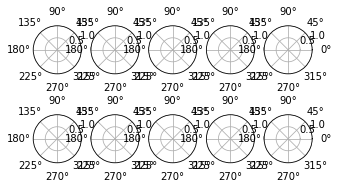

In [6]:
#This function creates the polar plots (used for figures)
def plot_polar_phase_somite10(ax, res, cmap,i):
    
    ax.plot(res[0], res[2], 'o', c=cmap(0.6), alpha=1, markersize =4)
    
    xL=['0',' ', r'$\frac{\pi}{2}$', ' ', r'$\pi$', ' ', r'$-\frac{\pi}{2}$',' ', ]

    ax.set_xticklabels(xL)
    ax.set_yticks([.5, 1.])
    
    return ax

#color maps
cmapIC = matplotlib.cm.get_cmap('YlOrBr')
cmapMN = matplotlib.cm.get_cmap('Reds')
cmapdI6 = matplotlib.cm.get_cmap('Greens')
cmapV0v = matplotlib.cm.get_cmap('Blues')
cmapV1 = matplotlib.cm.get_cmap('YlOrBr')
cmapV2a = matplotlib.cm.get_cmap('RdPu')

cmaps= [cmapMN(0.6), cmapIC(0.9), cmapdI6(0.6), cmapV0v(0.6), cmapV1(0.5), cmapV2a(0.6)]

col_index = 0

fig, ax = plt.subplots(2, 5, subplot_kw={'projection': 'polar'}, figsize=(5,3))

#cycle through cell types and plot phase delay between ipsilateral and contralateral cells
for j, (phase_delay_ipsi, phase_delay_contra, lbl_0) in enumerate(zip(phase_delay_ipsi_coll, phase_delay_contra_coll,
                                                       ['MN', 'dI6', 'V0v', 'V1', 'V2a'])):

    somite_index = 9
        
    for i,(res_ipsi, res_contra, lbl )in enumerate(zip(phase_delay_ipsi, phase_delay_contra,
                                                       ['MN', 'dI6', 'V0v', 'V1', 'V2a'])):
        if not i == j: 
            ax[0, col_index] = plot_polar_phase_somite10(ax[0, col_index], res_ipsi[somite_index], cmaps[i],i)
        ax[1, col_index] = plot_polar_phase_somite10(ax[1, col_index], res_contra[somite_index], cmaps[i], i)
        
    ax[0, col_index].tick_params(axis='x', labelsize= 7, pad= -2)
    ax[1, col_index].tick_params(axis='x', labelsize= 7, pad = -2)

    ax[0, col_index].set_rticks([])
    ax[1, col_index].set_rticks([])
    col_index = col_index + 1
    
plt.tight_layout()
plt.savefig("Phase_delays_Beat_and_glide_10000ms.png", dpi=1000)
plt.show()

## Figure 4 - video 1 - Base model

<IPython.core.display.Javascript object>


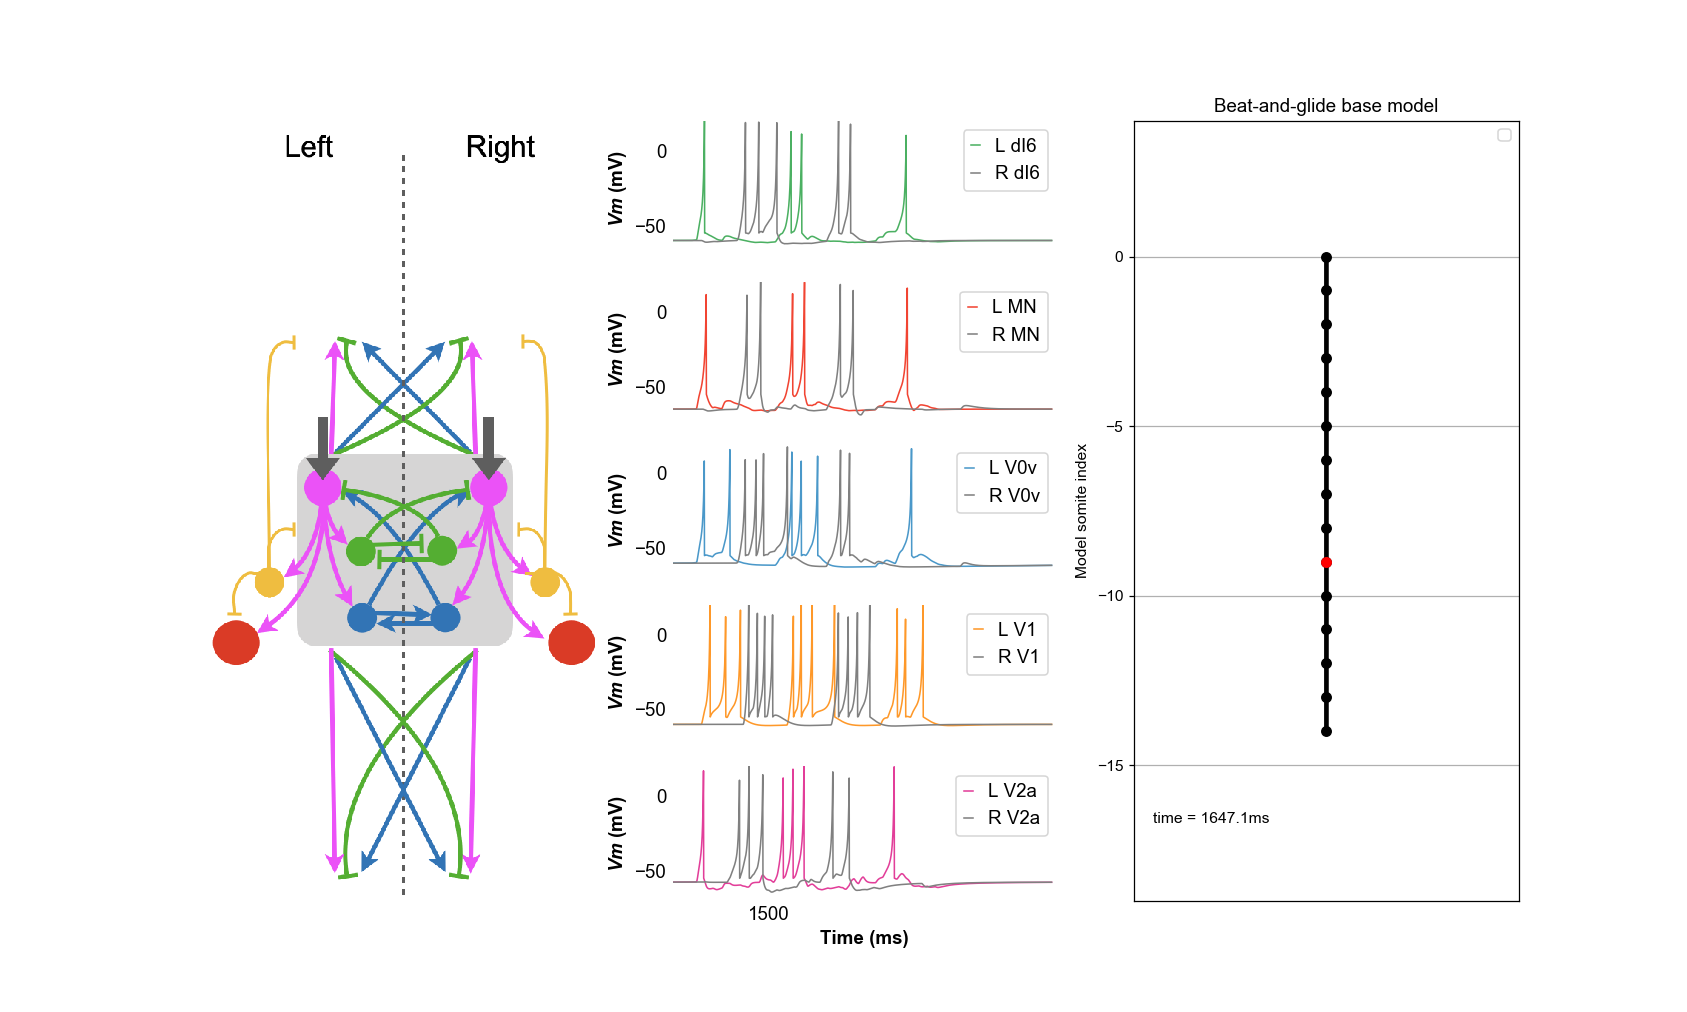

No handles with labels found to put in legend.


In [9]:

%matplotlib notebook
%matplotlib notebook
from Izhikevich_class import*
from Analysis_tools import *
import pandas as pd
import numpy as np
import matplotlib.image as mpimg

#Set line length and width
LINELENGTH = 0.5
LINEWIDTH = 1
plt.rc('lines', linewidth=LINEWIDTH) 

# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

SMALLER_SIZE = 12
SMALL_SIZE = 12

FONT_STYLE = 'bold'

# set y-axis limits
lower_y = -70
upper_y = 20

# Color maps
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')
cmapYellow = matplotlib.cm.get_cmap('YlOrBr')

# Insert beat and blide diagram
img = mpimg.imread('Beat_and_glide_diagram.png')

#This function combines the musculoskeletal model with the cell firing
def multipanel_anim(Time,nMuscle,nmax, VRdI6, VLdI6, VRMN, VLMN, VRV0v, VLV0v, VRV1, VLV1, VRV2a, VLV2a, VRMuscle,VLMuscle,dt):

    # Declare figure with subplots for musculoskeletal model, fig_angles, and for cell firing
    fig = plt.figure(figsize=(15, 9))
    
    fig_angles = fig.add_subplot(133)    
    fig_dI6 = fig.add_subplot(5,3,2)
    fig_MN = fig.add_subplot(5,3,5)
    fig_V0v = fig.add_subplot(5,3,8)
    fig_V1 = fig.add_subplot(5,3,11)
    fig_V2a = fig.add_subplot(5,3,14)
    
    fig_angles.set_title("Beat-and-glide base model")
    
    fig_diagram = fig.add_subplot(131)
    fig_diagram.imshow(img)
    fig_diagram.axis('off')
     
    LdI6_firing, = fig_dI6.plot([], [], lw=1, color = cmapGreen(0.6))
    RdI6_firing, = fig_dI6.plot([], [], lw=1, color = 'Grey')

    LMN_firing, = fig_MN.plot([], [], lw=1, color = cmapRed(0.6))
    RMN_firing, = fig_MN.plot([], [], lw=1, color = 'Grey')
 
    LV0v_firing, = fig_V0v.plot([], [], lw=1, color = cmapBlue(0.6))
    RV0v_firing, = fig_V0v.plot([], [], lw=1, color = 'Grey')

    LV1_firing, = fig_V1.plot([], [], lw=1, color = cmapYellow(0.5))
    RV1_firing, = fig_V1.plot([], [], lw=1, color = 'Grey')
    
    LV2a_firing, = fig_V2a.plot([], [], lw=1, color = cmapRedPurple(0.6))
    RV2a_firing, = fig_V2a.plot([], [], lw=1, color = 'Grey')
       
    Muscle_angles, = fig_angles.plot([], [], 'o-', lw=3, color = 'Black')
    Muscle_angles_highlight, = fig_angles.plot([], [], 'o-', lw=3, color = 'Red')
    
    # Allocating arrays for velocity and position
    vel = np.zeros((nMuscle, nmax))
    pos = np.zeros((nMuscle, nmax))
    
    # Setting constants and initial values for vel. and pos.
    khi = 3.0  #damping cste , high khi =0.5/ low = 0.1
    w0 = 2.5 #2.5  #20Hz = 125.6
    vel0 = 0.0
    pos0 = 0.0
    Wd = w0
    
    for k in range (0,nMuscle):
        vel[k,0] = vel0    #Sets the initial velocity
        pos[k,0] = pos0    #Sets the initial position
        pos[nMuscle-1,0] = 0.0
        for i in range(1,nmax):
        
            vel[k,i] = -(w0**2)*pos[k,i-1]*dt + vel[k,i-1]*(1-(2*dt*khi*w0)) + 0.1*VRMuscle[k,i-1]*dt - 0.1*VLMuscle[k,i-1]*dt
            pos[k,i] = dt*vel[k,i-1] + pos[k,i-1]
    
    ### DYNAMIC PLOTING
    
    x = np.zeros((nMuscle,nmax))
    y = np.zeros((nMuscle,nmax))
    
    for i in range (0,nmax):
        x[0,i] = 0
        y[0,i] = 0
        pos[0,i] = 0
        for k in range (1,nMuscle):
            pos[k,i] = pos[k-1,i] + pos[k,i]
            
            x[k,i] = x[k-1,i] + np.sin(pos[k,i])
            y[k,i] = y[k-1,i] - np.cos(pos[k,i])
    
    fig_angles.grid()
    fig_angles.set_ylim(-20, 5)
    fig_angles.set_xlim(-3, 3)
    fig_dI6.set_ylim(-80, 20)
    fig_dI6.set_xlim(0, nmax*dt)
    fig_MN.set_ylim(-80, 20)
    fig_MN.set_xlim(0, nmax*dt)
    fig_V0v.set_ylim(-80, 20)
    fig_V0v.set_xlim(0, nmax*dt)
    fig_V1.set_ylim(-80, 20)
    fig_V1.set_xlim(0, nmax*dt)
    fig_V2a.set_ylim(-80, 20)
    fig_V2a.set_xlim(0, nmax*dt)

    time_template = 'time = %.1fms'
    time_text = fig_angles.text(0.05, 0.1, '', transform=fig_angles.transAxes)
    fig_angles.legend()
    fig_angles.set_ylabel('Model somite index')
    fig_angles.set_ylim([-19, 4])
    fig_angles.set_xticks([])

    # set up dI6 plotting
    # Figure legend
    leg=fig_dI6.legend(handles=[LdI6_firing, RdI6_firing], labels=['L dI6','R dI6'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapGreen(0.6))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_dI6.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis title
    fig_dI6.set_ylim([lower_y, upper_y]) #y-axis limit
    #Remove borders
    fig_dI6.spines['top'].set_visible(False)
    fig_dI6.spines['right'].set_visible(False)
    fig_dI6.spines['bottom'].set_visible(False)
    fig_dI6.spines['left'].set_visible(False)
    #Tick parameters
    fig_dI6.tick_params(axis='both', which='both', length=0)
    for item in ([fig_dI6.title, fig_dI6.xaxis.label, fig_dI6.yaxis.label] +
             fig_dI6.get_xticklabels() + fig_dI6.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_dI6.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_dI6.set_xticks([i*5000 for i in range(0,5)])
    fig_dI6.set_xlim([Time[0], Time[-1]])
    
    # set up MN plotting. Same setup as dI6 plot
    leg=fig_MN.legend(handles=[LMN_firing, RMN_firing], labels=['L MN','R MN'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapRed(0.6))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_MN.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_MN.set_ylim([lower_y, upper_y])
    fig_MN.spines['top'].set_visible(False)
    fig_MN.spines['right'].set_visible(False)
    fig_MN.spines['bottom'].set_visible(False)
    fig_MN.spines['left'].set_visible(False)
    fig_MN.tick_params(axis='both', which='both', length=0)
    for item in ([fig_MN.title, fig_MN.xaxis.label, fig_MN.yaxis.label] +
             fig_MN.get_xticklabels() + fig_MN.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_MN.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_MN.set_xticks([i*5000 for i in range(0,5)])
    fig_MN.set_xlim([Time[0], Time[-1]])
    
    # set up V0v plotting. Same setup as dI6 plot
    leg=fig_V0v.legend(handles=[LV0v_firing, RV0v_firing], labels=['L V0v','R V0v'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapBlue(0.6))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_V0v.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_V0v.set_ylim([lower_y, upper_y])
    fig_V0v.spines['top'].set_visible(False)
    fig_V0v.spines['right'].set_visible(False)
    fig_V0v.spines['bottom'].set_visible(False)
    fig_V0v.spines['left'].set_visible(False)
    fig_V0v.tick_params(axis='both', which='both', length=0)
    for item in ([fig_V0v.title, fig_V0v.xaxis.label, fig_V0v.yaxis.label] +
             fig_V0v.get_xticklabels() + fig_V0v.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_V0v.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_V0v.set_xticks([i*5000 for i in range(0,5)])
    fig_V0v.set_xlim([Time[0], Time[-1]])

    # set up V1 plotting. Same setup as dI6 plot
    leg=fig_V1.legend(handles=[LV1_firing, RV1_firing], labels=['L V1','R V1'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapYellow(0.5))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_V1.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_V1.set_ylim([lower_y, upper_y])
    fig_V1.spines['top'].set_visible(False)
    fig_V1.spines['right'].set_visible(False)
    fig_V1.spines['bottom'].set_visible(False)
    fig_V1.spines['left'].set_visible(False)
    fig_V1.tick_params(axis='both', which='both', length=0)
    for item in ([fig_V1.title, fig_V1.xaxis.label, fig_V1.yaxis.label] +
             fig_V1.get_xticklabels() + fig_V1.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_V1.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_V1.set_xticks([i*5000 for i in range(0,5)])
    fig_V1.set_xlim([Time[0], Time[-1]])
    
    # set up V2a plotting. Same setup as dI6 plot
    leg=fig_V2a.legend(handles=[LV2a_firing, RV2a_firing], labels=['L V2a','R V2a'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapRedPurple(0.6))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_V2a.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_V2a.set_ylim([lower_y, upper_y])
    fig_V2a.spines['top'].set_visible(False)
    fig_V2a.spines['right'].set_visible(False)
    fig_V2a.spines['bottom'].set_visible(False)
    fig_V2a.spines['left'].set_visible(False)
    fig_V2a.tick_params(axis='both', which='both', length=0)
    for item in ([fig_V2a.title, fig_V2a.xaxis.label, fig_V2a.yaxis.label] +
             fig_V2a.get_xticklabels() + fig_V2a.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_V2a.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_V2a.set_xticks([i*500 for i in range(0,20)])
    fig_V2a.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
    fig_V2a.set_xlim([Time[0], Time[-1]])
    
    def init():
        Muscle_angles.set_data([], [])
        LdI6_firing.set_data([], [])
        RdI6_firing.set_data([], [])
        LMN_firing.set_data([], [])
        RMN_firing.set_data([], [])
        LV0v_firing.set_data([], [])
        RV0v_firing.set_data([], [])
        LV1_firing.set_data([], [])
        RV1_firing.set_data([], [])
        LV2a_firing.set_data([], [])
        RV2a_firing.set_data([], [])
        time_text.set_text('')
        return Muscle_angles, LdI6_firing, RdI6_firing, LMN_firing, RMN_firing, LV0v_firing, RV0v_firing, LV1_firing, RV1_firing, LV2a_firing, RV2a_firing,  time_text
    
    #This function drives the animation by updating the plot at every time point
    def animate(i):
        
        thisx = [x[k,i] for k in range(nMuscle)]
        thisy = [y[k,i] for k in range(nMuscle)]
        
        Muscle_angles.set_data(thisx, thisy)
        Muscle_angles_highlight.set_data(x[9,i], y[9,i])
        
        time_text.set_text(time_template % (Time[i]))

        LdI6_firing.set_data(Time[0:i], VLdI6[9, 0:i])
        RdI6_firing.set_data(Time[0:i], VRdI6[9, 0:i])

        LMN_firing.set_data(Time[0:i], VLMN[9, 0:i])
        RMN_firing.set_data(Time[0:i], VRMN[9, 0:i])
        
        LV0v_firing.set_data(Time[0:i], VLV0v[9, 0:i])
        RV0v_firing.set_data(Time[0:i], VRV0v[9, 0:i])

        LV1_firing.set_data(Time[0:i], VLV1[9, 0:i])
        RV1_firing.set_data(Time[0:i], VRV1[9, 0:i])

        LV2a_firing.set_data(Time[0:i], VLV2a[9, 0:i])
        RV2a_firing.set_data(Time[0:i], VRV2a[9, 0:i])
        
        return Muscle_angles, LdI6_firing, RdI6_firing, LMN_firing, RMN_firing, LV0v_firing, RV0v_firing, LV1_firing, RV1_firing, LV2a_firing, RV2a_firing,  time_text
     
    ani = animation.FuncAnimation(fig, animate, np.arange(1, len(Time), 10), #animation.FuncAnimation(fig, animate, np.arange(1, len(Time), 10), for faster animation
                                  interval=20, blit=False, init_func=init)
    
    plt.show()
    return ani

### NOW PLOTTING NEURON ACTIVITY DURING SWIMMING SIMULATION ###
# This file was used to make the figure for all of the neuron traces during a typical beat and glide model
read_data = pd.read_csv("Beat_and_Glide_10000ms.csv")

data_top = list(read_data.columns.values.tolist())
data_top

MN_index = []
dI6_index = [] 
V0v_index = []  
V2a_index = [] 
V1_index = []
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('dI6') != -1):
        dI6_index.append(int(data_top[i][data_top[i].find('dI6')+3:data_top[i].find('dI6')+5]))
        ndI6 = max(dI6_index) + 1
    if (data_top[i].find('V0v') != -1):
        V0v_index.append(int(data_top[i][data_top[i].find('V0v')+3:data_top[i].find('V0v')+5]))
        nV0v = max(V0v_index) + 1
    if (data_top[i].find('V2a') != -1):
        V2a_index.append(int(data_top[i][data_top[i].find('V2a')+3:data_top[i].find('V2a')+5]))
        nV2a = max(V2a_index) + 1
    if (data_top[i].find('V1') != -1):
        V1_index.append(int(data_top[i][data_top[i].find('V1')+2:data_top[i].find('V1')+4]))
        nV1 = max(V1_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nMN
VLMN = read_sim[1:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + ndI6
VLdI6 = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + ndI6
VRdI6 = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VLV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0v
VRV0v = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VLV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV2a
VRV2a = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV1
VLV1 = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV1
VRV1 = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END

# x range for coiling simulation

mywriter = animation.FFMpegWriter()
nMuscle = 15
dt = 0.1
tstart = 1450 #time start
tend = 1650 #time end
start = int(tstart/dt)
end = int(tend/dt)
nmax = int((tend-tstart)/dt)
ani = multipanel_anim(Time[start:end],nMuscle,nmax, VRdI6[:,start:end], VLdI6[:,start:end], VRMN[:,start:end], VLMN[:,start:end], 
                      VRV0v[:,start:end], VLV0v[:,start:end], VRV1[:,start:end], VLV1[:,start:end], VRV2a[:,start:end], 
                      VLV2a[:,start:end], VRMuscle[:,start:end],VLMuscle[:,start:end],dt)

In [ ]:
ani.save("./Figure 4 - video 1.mp4")